<a href="https://colab.research.google.com/github/kushagrasharma-13/Python/blob/main/House_Price_Prediction_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression

In [2]:
x_train = pd.read_csv('/content/drive/MyDrive/Python/Datasets/House Prices Dataset/train.csv')
x_test = pd.read_csv('/content/drive/MyDrive/Python/Datasets/House Prices Dataset/test.csv')
y_test = pd.read_csv('/content/drive/MyDrive/Python/Datasets/House Prices Dataset/sample_submission.csv')

In [3]:
x_test = pd.merge(x_test, y_test, on='Id')
#we are doing this step because 'SalePrice' of x_test is given sperately

In [4]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [5]:
x_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
x_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


# ***Data Pre-Processing:***

In [7]:
def clean(x):
    #clearing columns with too many null values
    na = x.isna().sum()
    label = []
    for i in na.index:
        if na[i]>100:
            label.append(i)
    x.drop(labels=label, inplace=True, axis=1)

    #label encoding all the object(string) datatype
    le = LabelEncoder()
    obj = []
    for i in x.dtypes.index:
        if x.dtypes[i]=='object': #finding object datatypes
            obj.append(i)
    for i in obj:
        x[i] = le.fit_transform(x[i])

    #finding columns with null values and filling them
    na = x.isna().sum() > 0
    for i in na.index:
        if na[i]:
            mode = x[i].mode()[0]
            x[i] = x[i].fillna(mode)


clean(x_train)
clean(x_test)

In [8]:
print(x_test.isna().sum().sum())

0


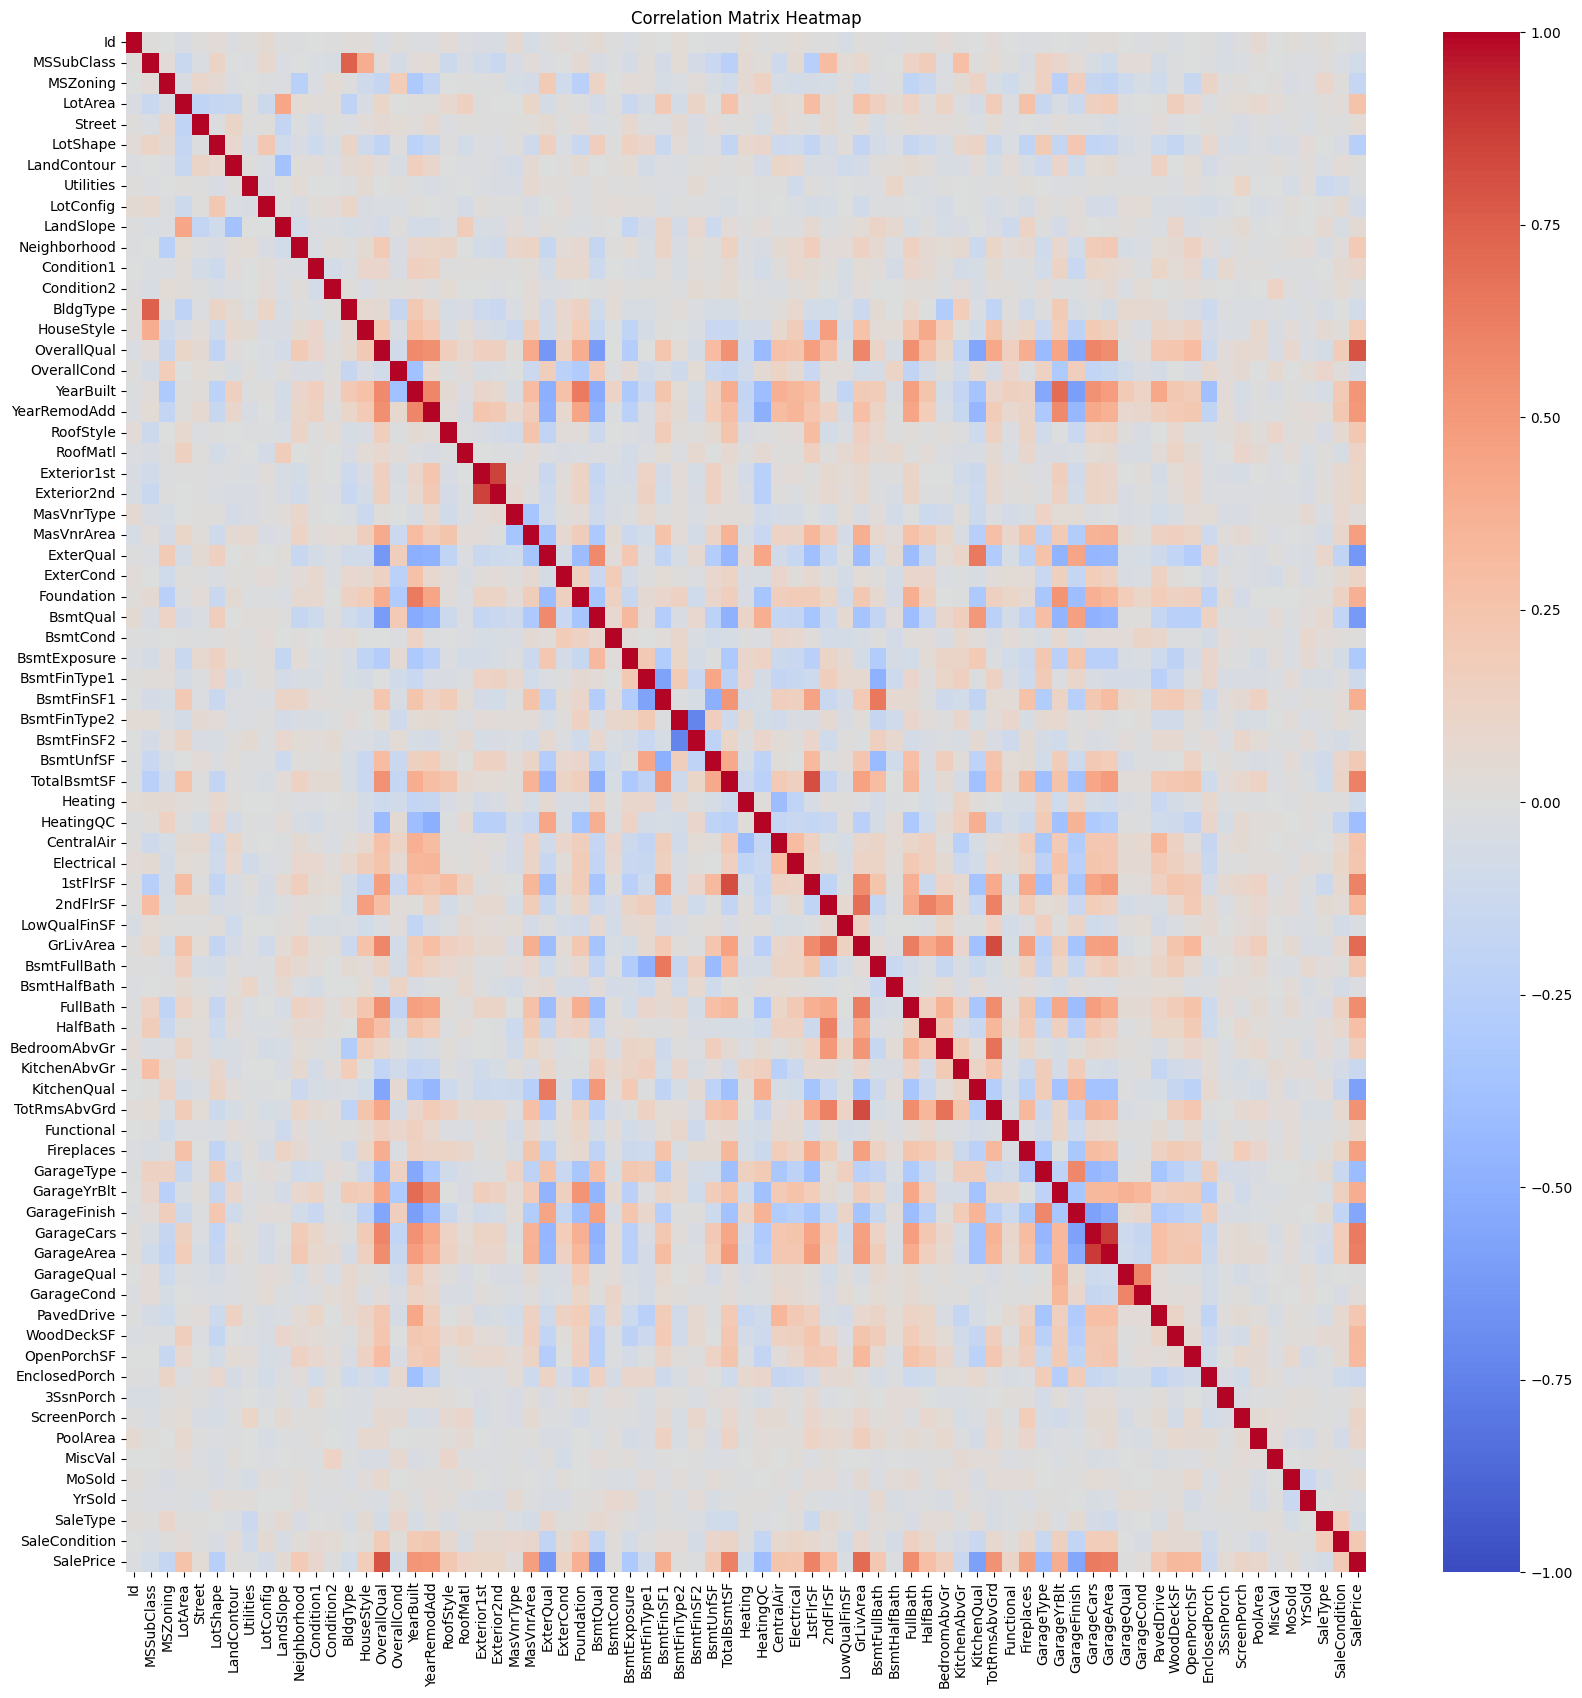

In [9]:
corr = x_train.corr()
corr

# Set up the figure
plt.figure(figsize=(20, 20))
# Create a heatmap using seaborn
sns.heatmap(corr, cmap="coolwarm", vmin=-1, vmax=1)
# Add title and adjust layout
plt.title("Correlation Matrix Heatmap")
# Show the plot
plt.show()

In [10]:
labels_to_drop = []
price_corr = x_train.corr()['SalePrice']
for i in price_corr.index:
    if price_corr[i]<0.5:
        labels_to_drop.append(i)


x_train.drop(columns=labels_to_drop, inplace=True)
x_test.drop(columns=labels_to_drop, inplace=True)

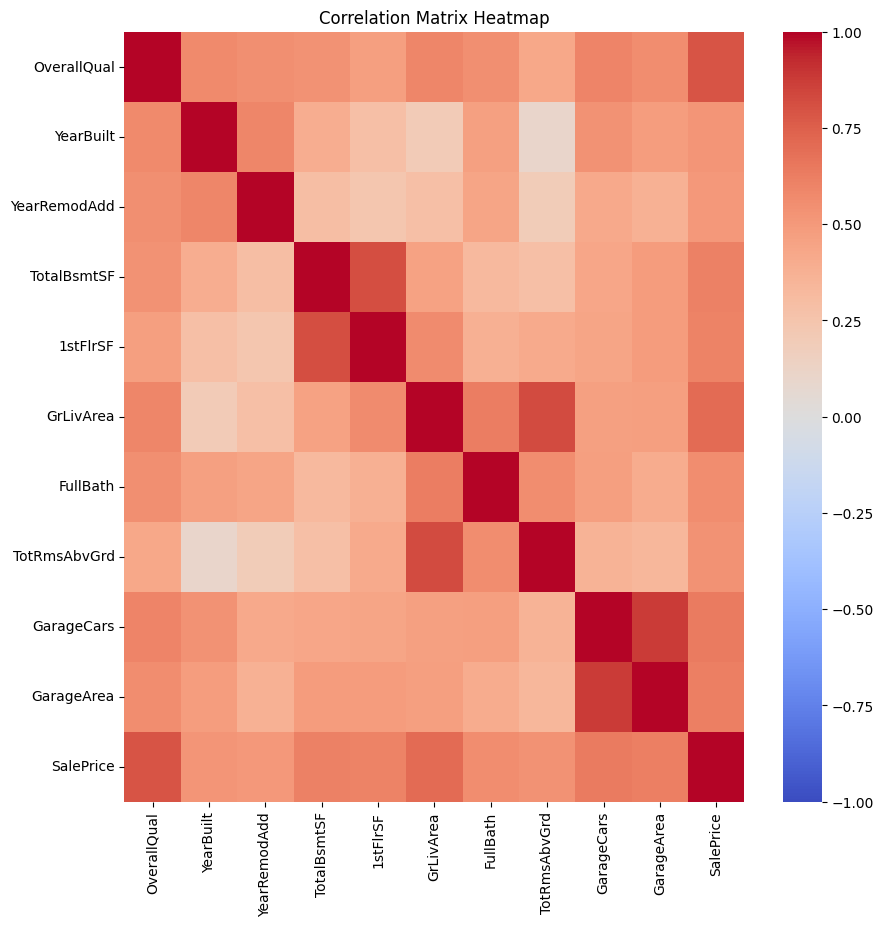

In [11]:
corr = x_train.corr()
corr

# Set up the figure
plt.figure(figsize=(10, 10))
# Create a heatmap using seaborn
sns.heatmap(corr, cmap="coolwarm", vmin=-1, vmax=1)
# Add title and adjust layout
plt.title("Correlation Matrix Heatmap")
# Show the plot
plt.show()

In [12]:
#seperating independent from dependent variables

y_train = x_train['SalePrice']
x_train = x_train.drop(columns='SalePrice')

y_test = x_test['SalePrice']
x_test = x_test.drop(columns='SalePrice')

In [13]:
LR = LinearRegression()
LR.fit(x_train, y_train)

LinearRegression()

In [14]:
y_pred = LR.predict(x_test)

In [15]:
diff = y_test-y_pred

LR_df = pd.concat([pd.Series(y_pred), pd.Series(y_test),pd.Series(diff)], axis=1)
LR_df.columns = ['Prediction', 'Test', 'Difference']
LR_df

,Prediction,Test,Difference
0,110135.921109,169277.052498,59141.131390
1,159059.960195,187758.393989,28698.433793
2,169683.677293,183583.683570,13900.006277
3,188059.736835,179317.477511,-8742.259324
4,219781.967519,150730.079977,-69051.887543
...,...,...,...
1454,72702.982138,167081.220949,94378.238811
1455,87428.982764,164788.778231,77359.795467
1456,156695.015844,219222.423400,62527.407556
1457,111786.599844,184924.279659,73137.679815
